# Import libary 

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load data

In [2]:

water_path = "/content/drive/MyDrive/Project_HK1_2022/Data_Visualization/data/data_Mực_Nước/Mulgrave_2019_Theo_Ngay_NoMiss.csv"
temp_path  = "/content/drive/MyDrive/Project_HK1_2022/Data_Visualization/data/Daily_Max_min_Temperature_2017_2019.csv"
rain_path  = "/content/drive/MyDrive/Project_HK1_2022/Data_Visualization/data/Deeral_Amount_2017_2018_2019.csv"


In [3]:

data_water = pd.read_csv(water_path)
data_temp = pd.read_csv(temp_path)
data_rain = pd.read_csv(rain_path)


View dataset:

In [4]:
data_water.head(10)

,Date,Q,Conductivity,NO3,Temp,Turbidity,Level,Dayofweek,Month
0,2019-01-01,318.067079,54.446042,0.150958,25.855417,7.564375,15.803979,1.0,1.0
1,2019-01-02,249.989918,64.315625,0.158958,26.443958,6.977500,15.626612,2.0,1.0
2,2019-01-03,196.128067,68.088542,0.147771,26.703542,6.779583,15.459925,3.0,1.0
3,2019-01-04,145.327180,72.586667,0.144833,26.727708,6.270208,15.298846,4.0,1.0
4,2019-01-05,112.578941,81.704375,0.149958,26.984792,6.375833,15.232389,5.0,1.0
5,2019-01-06,90.146281,87.855417,0.150125,27.137500,7.142917,15.161863,6.0,1.0
6,2019-01-07,76.446333,91.450000,0.150750,27.238125,5.854167,15.108770,0.0,1.0
7,2019-01-08,61.766264,90.834375,0.148562,27.643750,4.428750,15.107113,1.0,1.0
8,2019-01-09,50.201318,91.373542,0.145604,28.088750,3.934792,15.089567,2.0,1.0
9,2019-01-10,47.511604,89.806875,0.141979,28.444583,3.407708,15.054682,3.0,1.0


In [5]:
data_temp.head(10)

,Date time,Max temp,Min temp
0,2017-01-01,33.4,23.6
1,2017-01-02,34.4,25.3
2,2017-01-03,32.1,24.4
3,2017-01-04,32.5,24.6
4,2017-01-05,30.8,24.5
5,2017-01-06,31.8,23.5
6,2017-01-07,33.2,24.5
7,2017-01-08,30.5,24.4
8,2017-01-09,32.3,25.2
9,2017-01-10,29.3,24.4


In [6]:
data_rain.head(10)

,Date time,Amount
0,2017-Jan-1,0
1,2017-Jan-2,0.4
2,2017-Jan-3,40
3,2017-Jan-4,69
4,2017-Jan-5,25
5,2017-Jan-6,28
6,2017-Jan-7,21
7,2017-Jan-8,95
8,2017-Jan-9,39
9,2017-Jan-10,85


In [7]:
data_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          365 non-null    object 
 1   Q             365 non-null    float64
 2   Conductivity  365 non-null    float64
 3   NO3           365 non-null    float64
 4   Temp          365 non-null    float64
 5   Turbidity     365 non-null    float64
 6   Level         365 non-null    float64
 7   Dayofweek     365 non-null    float64
 8   Month         365 non-null    float64
dtypes: float64(8), object(1)
memory usage: 25.8+ KB


In [8]:
data_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date time  1095 non-null   object
 1   Amount     1095 non-null   object
dtypes: object(2)
memory usage: 17.2+ KB


In [9]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date time  1095 non-null   object 
 1   Max temp   1088 non-null   float64
 2   Min temp   1093 non-null   float64
dtypes: float64(2), object(1)
memory usage: 25.8+ KB


**Nhận xét:**\
Thuộc tính "Date time" của các bộ dữ liệu chưa đồng nhất với nhau.\
Thuộc tính "Amount" của bộ data_rain phải là kiểu dữ liệu numeric.\
Để thuận tiện cho việc phân tích thăm dò, lấy mean 2 thuộc tính 'Max temp' và 'Mix temp' ở bộ data_temp.\
Nhưng ở 2 thuộc tính trên có một vài giá trị bị khuyết.\
Vì vậy, cần phải điều chỉnh các bộ dữ liệu.

# Adjust data

**Điều chỉnh lại thuộc tính Date time các bộ dữ liệu**

In [10]:
# Đổi tên thuộc tính và bỏ các thuộc tính không cần thiết trên bộ data_water
data_water = data_water.rename({'Date': 'Date time', 'Temp': 'Water temperature'}, axis = 1)
data_water = data_water.drop(['Dayofweek', 'Month'], axis = 1)

In [11]:
# Đổi Date time của bộ data_rain về đúng định dạng
year  = pd.to_datetime(data_rain['Date time']).dt.year
month = pd.to_datetime(data_rain['Date time']).dt.month
day   = pd.to_datetime(data_rain['Date time']).dt.day
data_rain['Date time'] = pd.to_datetime(year*10000 + month*100 + day, format='%Y%m%d')  
data_rain['Date time'] = data_rain['Date time'].dt.strftime('%Y-%m-%d')                 # chuyển datetime về kiểu string

In [12]:
# Lọc các sample của năm 2019
data_water = data_water[(data_water['Date time'] >= '2019-01-01') & (data_water['Date time'] <= '2019-12-31')]
data_rain  = data_rain[(data_rain['Date time'] >= '2019-01-01') & (data_rain['Date time'] <= '2019-12-31')]
data_temp  = data_temp[(data_temp['Date time'] >= '2019-01-01') & (data_temp['Date time'] <= '2019-12-31')]

**Điều chỉnh thuộc tính trên bộ data_rain về kiểu dữ liệu mong muốn**

In [13]:
# Đổi tên thuộc tính cho phù hợp
data_rain = data_rain.rename({'Amount': 'Rainfall'}, axis = 1)

# Chuyển thuộc tính "Rainfall" về kiểu dữ liệu numeric
data_rain['Rainfall'] = pd.to_numeric(data_rain['Rainfall'])

**Kiểm tra trên bộ data_temp có còn bị khuyết dữ liệu hay không?**

In [14]:
data_temp[((data_temp['Max temp'].isnull()) | (data_temp['Min temp'].isnull())) | ((data_temp['Max temp'].isnull()) & (data_temp['Min temp'].isnull()))]

,Date time,Max temp,Min temp
780,2019-02-20,37.5,NaN
838,2019-04-19,NaN,21.1
839,2019-04-20,NaN,21.1
913,2019-07-03,NaN,13.3
1080,2019-12-17,NaN,22.6
1081,2019-12-18,33.5,NaN


Ta thấy rằng, bộ dữ liệu còn một số mẫu dữ liệu bị khuyết. Tuy nhiên, ở các mẫu dữ liệu này chỉ có tối đa 1 thuộc tính bị khuyết dữ liệu.\
Vì vậy, để thuận tiện cho việc tính nhiệt độ trung bình, đối với các mẫu dữ liệu này, ta lấy giá trị của thuộc tính còn lại làm giá trị trung bình của nhiệt độ của mẫu dữ liệu đó.\
Đối với các mẫu dữ liệu còn lại, nhiệt độ trung bình có giá trị bằng trung bình cộng của nhiệt độ cao nhất và nhiệt độ thấp nhất trong ngày. 

In [15]:
mean_t = []
for max_t, min_t in zip(data_temp['Max temp'], data_temp['Min temp']):
  if np.isnan(max_t): 
    mean_t.append(min_t)
  elif np.isnan(min_t): 
    mean_t.append(max_t)
  else:
    mean_t.append((max_t + min_t) / 2)
data_temp['Mean temperature'] = mean_t

**Kiểm tra lại trên bộ data_temp có còn bị khuyết dữ liệu hay không?**

In [16]:
data_temp.isnull().sum()

Date time           0
Max temp            4
Min temp            2
Mean temperature    0
dtype: int64

In [17]:
# Bỏ các thuộc tính không cần thiết
data_temp = data_temp.drop(['Max temp', 'Min temp'], axis = 1)

**Tổng hợp 3 bộ dữ liệu lại để bắt đầu phân tích thăm dò**

In [18]:

df = pd.concat(
    objs = (iDF.set_index('Date time') for iDF in (data_water, data_rain, data_temp)),
    axis = 1, 
    join = 'inner').reset_index()

df


,Date time,Q,Conductivity,NO3,Water temperature,Turbidity,Level,Rainfall,Mean temperature
0,2019-01-01,318.067079,54.446042,0.150958,25.855417,7.564375,15.803979,2.0,27.85
1,2019-01-02,249.989918,64.315625,0.158958,26.443958,6.977500,15.626612,9.0,27.35
2,2019-01-03,196.128067,68.088542,0.147771,26.703542,6.779583,15.459925,0.4,26.40
3,2019-01-04,145.327180,72.586667,0.144833,26.727708,6.270208,15.298846,0.0,26.45
4,2019-01-05,112.578941,81.704375,0.149958,26.984792,6.375833,15.232389,6.0,27.45
...,...,...,...,...,...,...,...,...,...
360,2019-12-27,16.616211,14206.398125,0.045375,28.541667,7.504375,14.971728,11.0,27.35
361,2019-12-28,29.347156,9688.272771,0.091813,28.154792,5.246250,14.984101,17.0,27.05
362,2019-12-29,50.351510,9666.640000,0.042437,27.839375,4.960625,14.983149,20.0,27.15
363,2019-12-30,47.494699,961.865833,0.403104,26.757292,14.585000,14.988018,52.0,27.70


In [19]:
type(df['Date time'][0])

str

In [20]:
# Chuyển thuộc tính "Date time" từ string về dạng datetime
# from datetime import datetime
# df['Date time'] = [datetime.strptime(d, '%Y-%m-%d') for d in df['Date time']]
df['Date time'] = pd.to_datetime(df['Date time'])

In [21]:
type(df['Date time'][0])

pandas._libs.tslibs.timestamps.Timestamp

# Tìm các feature có correlation ảnh hưởng với nhau

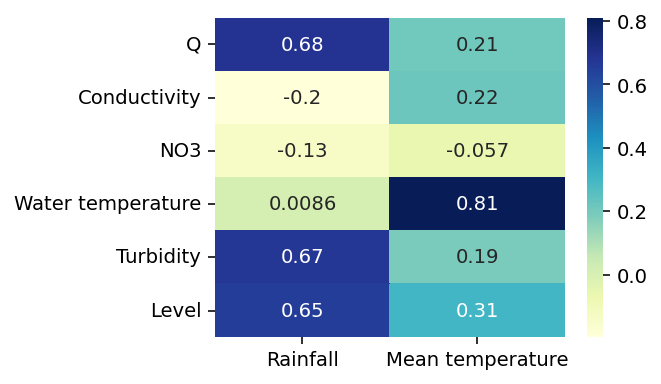

In [22]:

plt.subplots(figsize = [4, 3], dpi = 141)
sns.heatmap(df.corr()[['Rainfall', 'Mean temperature']].drop(index = ['Rainfall', 'Mean temperature']),
            cmap="YlGnBu",
            annot=True
)


**Nhận xét:**\
Dựa vào heatmap trên, ta thấy có các thuộc tính có mức độ tương quan với nhau (trên 0.5) như:
- Các thuộc tính "Q", "Turbidity", "Level" với "Rainfall".
- Các thuộc tính "Level", "Water temperature" với "Mean temperature".

# Ảnh hưởng của lượng mưa đối với các yếu tố trong nước

In [23]:
df['Rainfall'].describe()

count    365.000000
mean       9.886027
std       25.590510
min        0.000000
25%        0.000000
50%        0.400000
75%        9.000000
max      253.000000
Name: Rainfall, dtype: float64

**Nhận xét:**\
Từ kết quả trên, ta thấy được lượng mưa trung bình năm 2019 chỉ đạt tới 9.89 (mm). Lượng mưa cao nhất trong năm 2019 là 253(mm). Lượng mưa thấp hơn 0.4(mm) được ghi nhận nhiều nhất, tần suất có lượng mưa lớn hơn 50 (mm) là rất thấp.

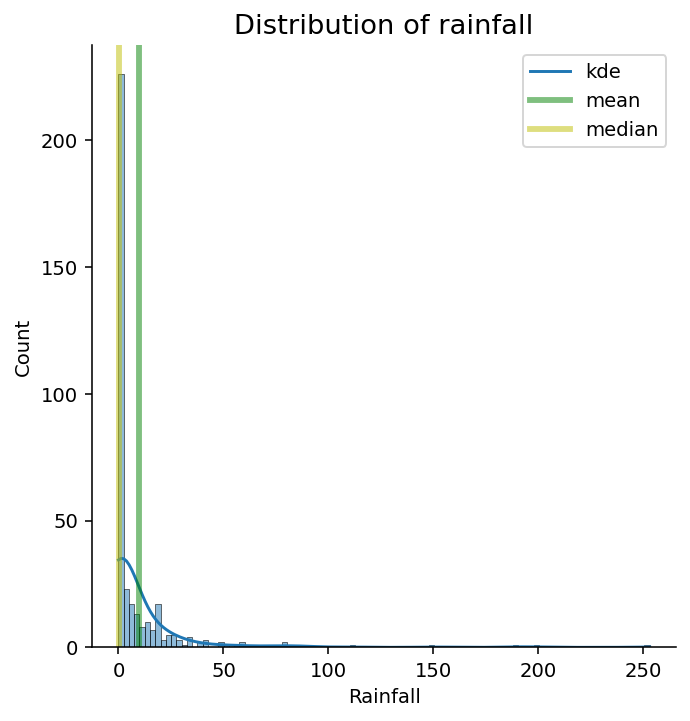

In [24]:

sns.displot(df['Rainfall'], 
            kde = True, 
            #height = 4, 
            #aspect = 2
).fig.set_dpi(141)
plt.axvline(x = df['Rainfall'].mean(),
            linewidth = 3,
            color = 'g',
            label = "mean",
            alpha = 0.5
)
plt.axvline(x = df['Rainfall'].median(),
            linewidth = 3,
            color = 'y',
            label = "median",
            alpha = 0.5
)

# set title, legends and labels
plt.xlabel("Rainfall")
plt.ylabel("Count")
plt.title("Distribution of rainfall", size = 14)
plt.legend(["kde", "mean", "median"])


**Nhận xét:**\
Nhìn vào biểu đồ, ta thấy được dữ liệu lượng mưa mỗi ngày được phân phối tích cực (median < mean). Độ lệch nghiêng của dữ liệu so với giá trị trung bình theo xu thế tích cực. Dựa vào đường cong trên biểu đồ có thể thấy dữ liệu đang có các giá trị chênh lệch khá lớn do ảnh hưởng của các giá trị ngoại lệ.

In [25]:
rainfall_correlated_features = ['Q', 'Turbidity', 'Level']

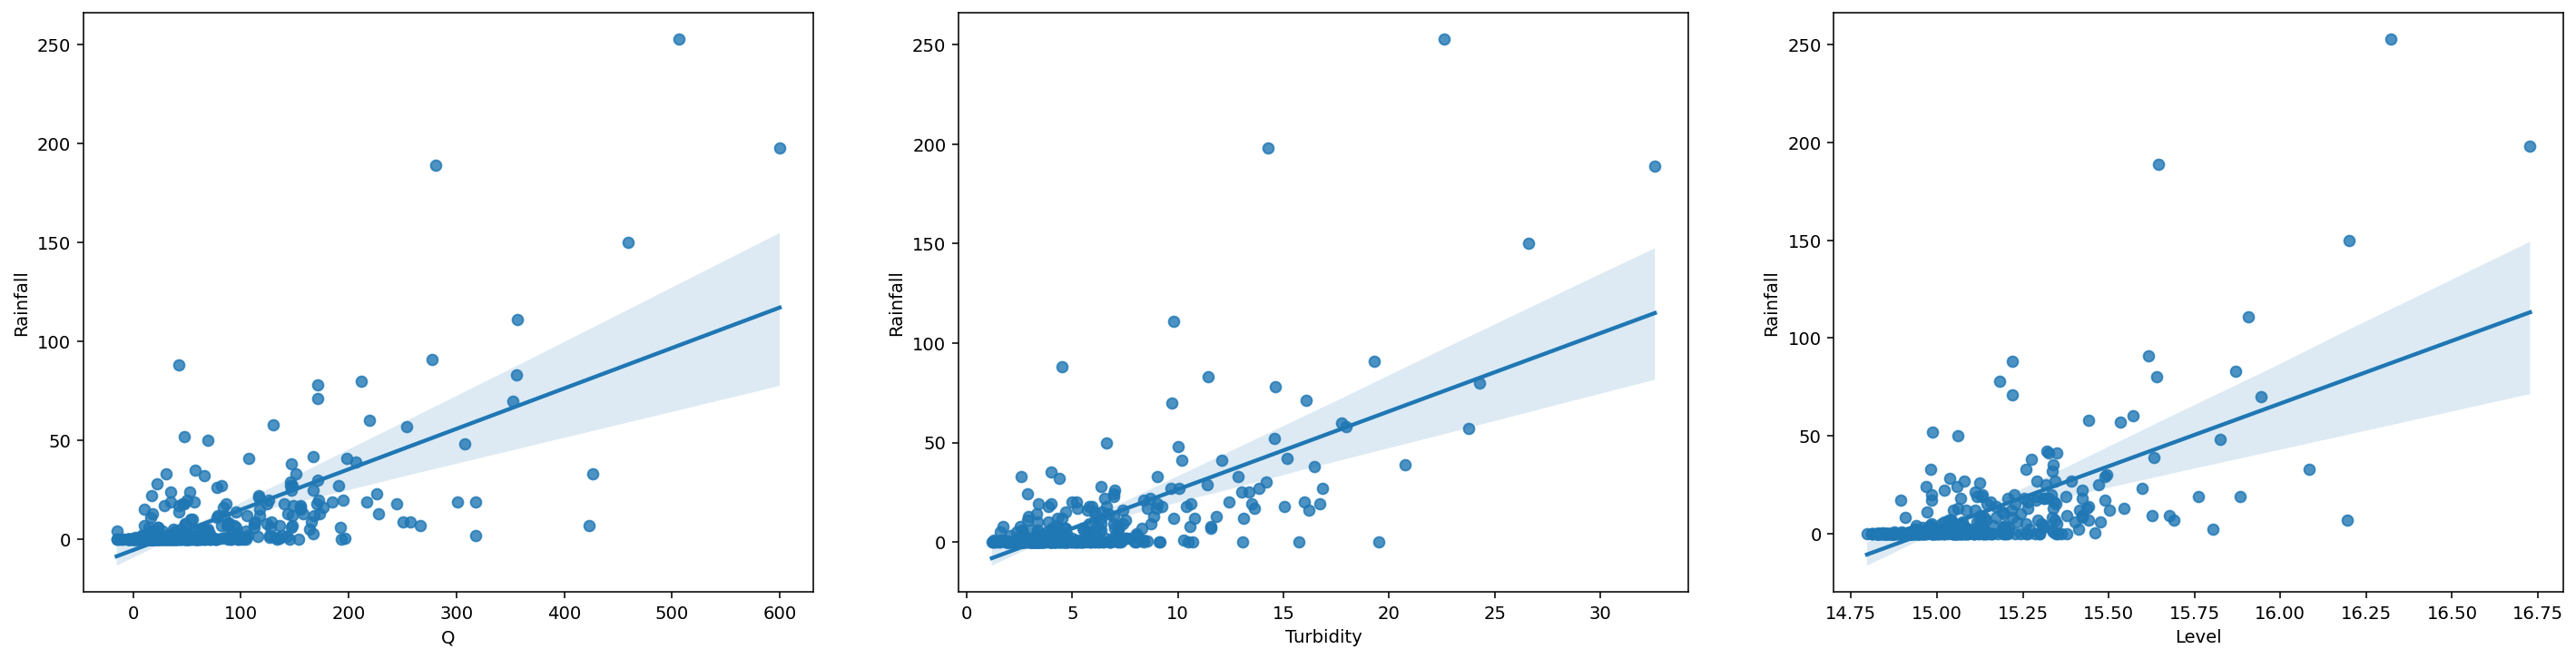

In [26]:

l = len(rainfall_correlated_features)
fig, axs = plt.subplots(nrows=1, ncols=l, figsize=[25, 6], dpi=141)
for i in range(0, l):
  sns.regplot(x=rainfall_correlated_features[i], y='Rainfall', data=df, ax=axs[i])
# fig.delaxes(axs[-1 + int(l/2), 1])


**Nhận xét:**\
Dựa vào các biểu đồ trên, có thể kết luận rằng, các thuộc tính "Q", "Turbidity", "Level" đều có mối quan hệ tuyến tính đồng thuận với thuộc tính "Rainfall". 

In [27]:

from scipy import stats
for name_f in rainfall_correlated_features:
  print(name_f)
  pearson_coef, p_value = stats.pearsonr(df[name_f], df['Rainfall'])
  print("Pearson coef:", pearson_coef)
  print("P-value:", p_value)
  print('\n')


Q
Pearson coef: 0.6843221149761697
P-value: 9.864294228019066e-52


Turbidity
Pearson coef: 0.674567521530701
P-value: 8.73442612879677e-50


Level
Pearson coef: 0.6546241513584872
P-value: 4.989400844967286e-46




**Nhận xét:**\
Từ kết quả trên, có thể thấy rằng, mức độ tương quan tuyến tính đồng thuận giữa các thuộc tính "Q", "Turbidity", "Level" với thuộc tính "Rainfall" tương đối mạnh. Vì hệ số tương quan tuyến tính gần về 1 (~0.7) và p-value < 0.001.

# Kết luận
Từ các nhận xét trên, có thể kết luận rằng, lưu lượng mưa trong ngày có ảnh hưởng đến các yếu tố như mực nước, lưu lượng và độ đục của nước, giữa chúng đều có mối quan hệ tuyến tính đồng thuận. Khá thực tế, khi những ngày có lượng mưa cao thì mực nước và lưu lượng của nước tăng cao đáng kể. Còn độ đục của nước nhiều lên, khả năng là do ảnh hưởng của mực nước dâng cao làm lưu lượng nước càng lớn và dày thêm khi bị ảnh hưởng bởi sự tăng lên lưu lượng mưa.

Tuy nhiên, nếu nhìn lại các regplot của yếu tố lượng mưa so với các yếu tố mực nước, lưu lượng và độ đục của nước. Dễ dàng nhận thấy, các điểm dữ liệu tập trung khá nhiều về góc trái biểu đồ (gần với 0). Có lẽ bởi vì sự ảnh hưởng của các giá trị ngoại lệ trong yếu tố lượng mưa. Qua đó, cho thấy trong năm 2019, tần suất có mưa ở khu vực này là khá ít, và vì vậy mà có thể nhiệt độ trung bình hàng ngày trong năm 2019 sẽ ít có sự chênh lệch với nhau và nếu đúng như vậy dữ liệu nhiệt độ trung bình trong ngày năm 2019 phân bố đều, không xuất hiện các giá trị ngoại lệ và cũng không bị ảnh hưởng bởi chúng.

# Ảnh hưởng của nhiệt độ trung bình đối với các yếu tố trong nước

In [28]:
df['Mean temperature'].describe()

count    365.000000
mean      24.595068
std        3.195617
min       13.300000
25%       22.450000
50%       25.100000
75%       27.050000
max       37.500000
Name: Mean temperature, dtype: float64

**Nhận xét:**\
Từ kết quả trên, ta nhận thấy rằng, nhiệt độ trung bình năm 2019 đạt tới 24,6 (độ C). Nhiệt độ cao nhất trong năm 2019 là 37,5 (độ C). Nhiệt độ trong năm 2019 thường rơi vào khoảng 23 đến 27 (độ C), tần suất có nhiệt độ 25 (độ C) là rất nhiều.

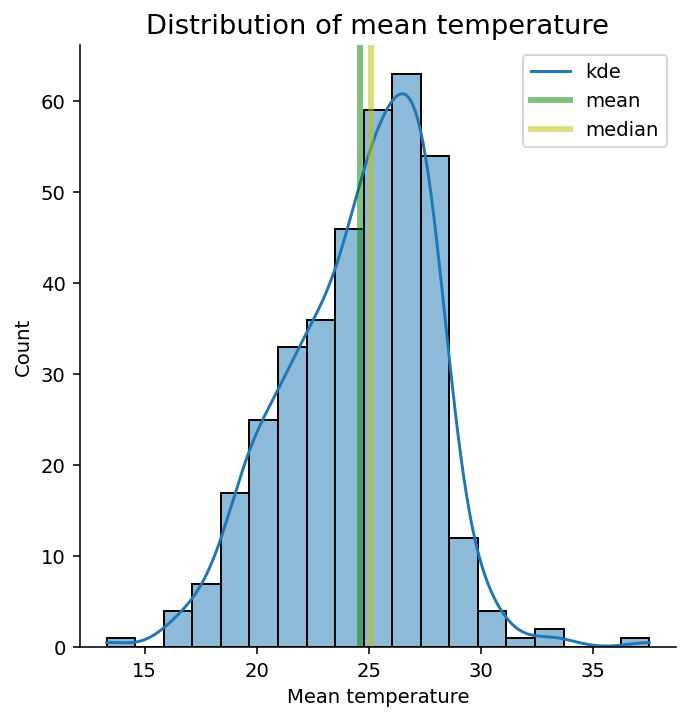

In [29]:

sns.displot(df['Mean temperature'], 
            kde = True,
            #height = 3,
            #aspect = 2
).fig.set_dpi(141)
plt.axvline(x = df['Mean temperature'].mean(),
            linewidth = 3,
            color = 'g',
            label = "mean",
            alpha = 0.5
)
plt.axvline(x = df['Mean temperature'].median(),
            linewidth = 3,
            color = 'y',
            label = "median",
            alpha = 0.5
)

# set title, legends and labels
plt.xlabel("Mean temperature")
plt.ylabel("Count")
plt.title("Distribution of mean temperature", size = 14)
plt.legend(["kde", "mean", "median"])

**Nhận xét:**\
Nhìn vào biểu đồ, ta thấy đường cong bình thường, chứng tỏ dữ liệu nhiệt độ hàng ngày được phân phối đối xứng (mean ~ median). Độ lệch nghiêng của dữ liệu so với giá trị trung bình gần như bằng 0. Dựa vào đường cong trên biểu đồ, có thể thấy dữ liệu tuân theo một phân phối chuẩn và không bị ảnh hưởng nhiều bởi các giá trị ngoại lệ.

In [30]:
temp_correlated_features = ['Level', 'Water temperature']

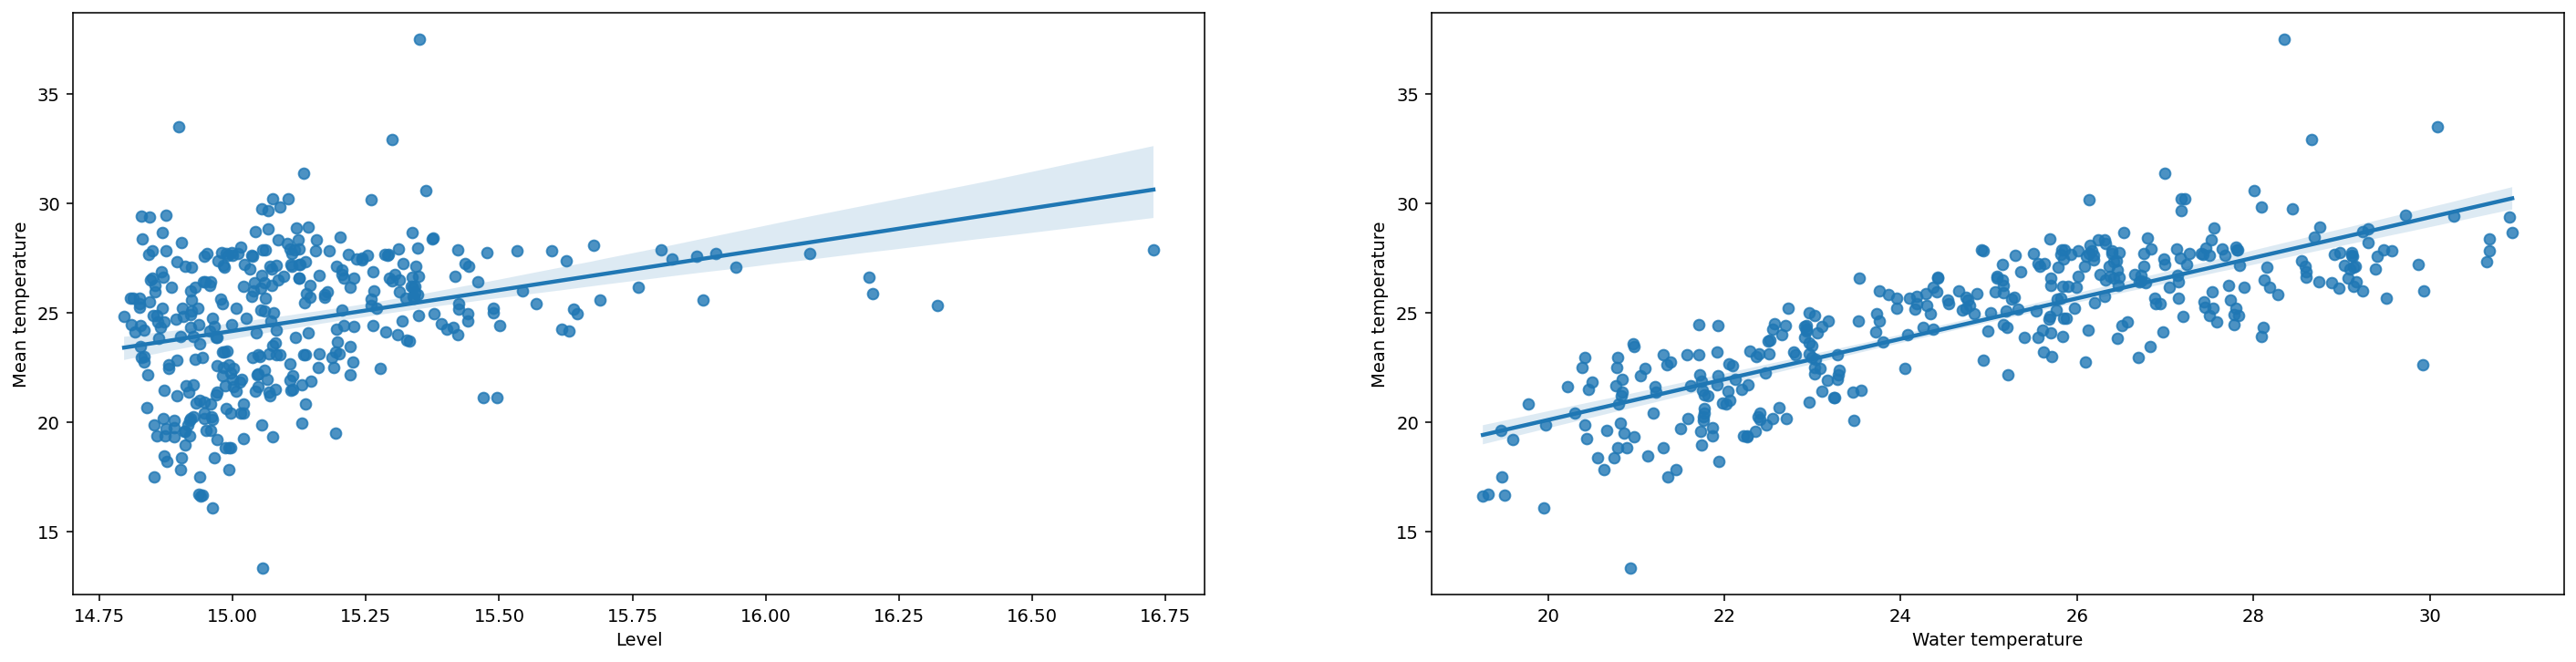

In [31]:

l = len(temp_correlated_features)
fig, axs = plt.subplots(nrows=1, ncols=l, figsize=[25, 6], dpi=141)
for i in range(0, l):
  sns.regplot(x=temp_correlated_features[i], y='Mean temperature', data=df, ax=axs[i])
# fig.delaxes(axs[-1 + int(l/2), 1])


**Nhận xét:**\
Dựa vào các biểu đồ trên, có thể kết luận rằng, các thuộc tính "Level", "Water temperature" đều có mối quan hệ tuyến tính đồng thuận với thuộc tính "Mean temperature".

In [32]:
from scipy import stats
for name_f in temp_correlated_features:
  print(name_f)
  pearson_coef, p_value = stats.pearsonr(df[name_f], df['Mean temperature'])
  print("Pearson coef:", pearson_coef)
  print("P-value:", p_value)
  print('\n')

Level
Pearson coef: 0.30559141177368354
P-value: 2.4993907816268287e-09


Water temperature
Pearson coef: 0.8100592530900302
P-value: 3.572597375335799e-86




**Nhận xét:**\
Từ kết quả trên, có thể thấy rằng, mức độ tương quan tuyến tính đồng thuận giữa các thuộc tính "Water temperature" với "Mean temperature" mạnh. Vì hệ số tương quan tuyến tính gần như về 1 và p-value < 0.001. Còn mức độ tương quan tuyến tính đồng thuận giữa các thuộc tính "Level" với "Mean temperature" chỉ tương đối, vì hệ số tương quan tuyến tính giữa 2 thuộc tính chỉ xấp xỉ bằng 0.3 (khá xa so với 1).

# Kết luận
Từ các nhận xét trên, có thể kết luận rằng, nhiệt độ trung bình trong ngày có sự ảnh hưởng lớn đến nhiệt độ của nước, giữa chúng có mối quan hệ tuyến tính đồng thuận. Cụ thể, khi nhiệt độ trung bình trong ngày tăng lên, nhiệt độ của nước cũng tăng theo một khoảng nhất định và ngược lại.

Còn đối với mực nước trong ngày lại ít bị ảnh hưởng bởi nhiệt độ trung bình ngày. Giữa chúng cũng có mối hệ tuyến tính đồng thuận nhưng không mạnh. Tần suất mực nước dâng cao ở những ngày có nhiệt độ trung bình cao là khá thấp, nhưng không có nghĩa là không có.\
Việc mực nước ít bị tác động bởi nhiệt độ trung bình trong ngày là vì mực nước bị ảnh hưởng nhiều bởi những yếu tố khác, cụ thể là lượng mưa trong ngày.

# NO3 voi Rainfall

 Mean NO3 value: 0.2340030156012557 
 Median NO3 value: 0.1380625 
 Min NO3 value: 0.0158648989999999 
 Max NO3 value: 1.2105625


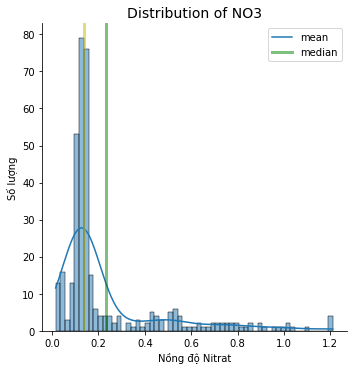

In [33]:
sns.displot(df["NO3"], kde=True)
plt.axvline(x=df.NO3.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.NO3.median(), linewidth=3, color='y', label="median", alpha=0.5)

plt.xlabel("Nồng độ Nitrat")
plt.ylabel("Số lượng")
plt.title("Distribution of NO3", size=14)
plt.legend(["mean", "median"]);

print(f' Mean NO3 value: {df.NO3.mean()} \n Median NO3 value: {df.NO3.median()} \n Min NO3 value: {df.NO3.min()} \n Max NO3 value: {df.NO3.max()}')

## Plot per month

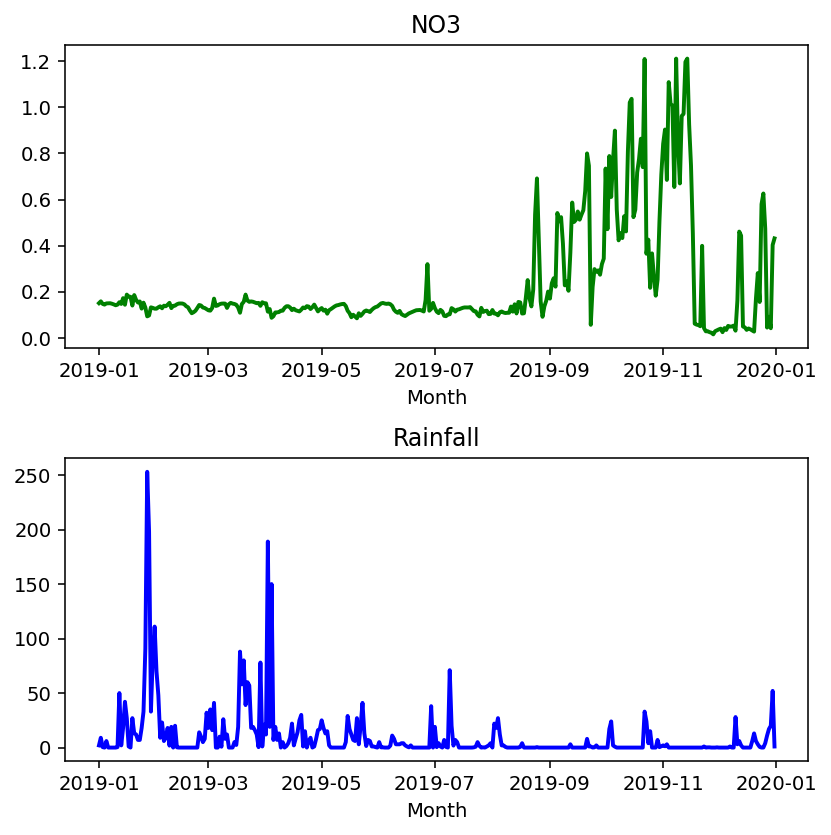

In [34]:
# Ve 2 line plot no3 vs rainfall
import matplotlib.dates as mdates

# Create figure and plot space
fig, ax = plt.subplots(2, figsize=[6, 6], dpi = 141)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax[0].plot(df['Date time'], df['NO3'], linewidth = 2, color='g')
ax[0].set_xlabel('Month')
ax[0].set_title('NO3')

ax[1].plot(df['Date time'], df['Rainfall'], linewidth = 2, color='b')
ax[1].set_xlabel('Month')
ax[1].set_title('Rainfall')

fig.tight_layout(pad = 1.0) # space 2 plot 

# plt.gcf().autofmt_xdate()
plt.show()

## Plot mean per month

In [35]:
df_mean_no3 = df.groupby(pd.PeriodIndex(df['Date time'], freq="M"))[['NO3', 'Rainfall']].mean()
#df_mean_no3.reset_index(inplace=True)

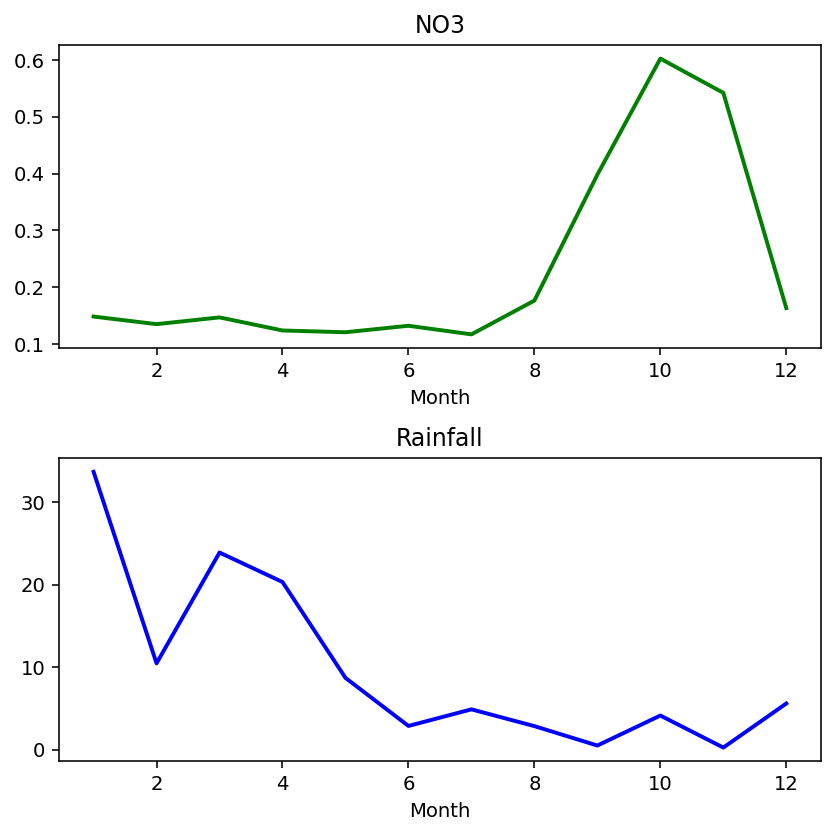

In [36]:
# Ve 2 line plot no3 vs rainfall
import matplotlib.dates as mdates

# Create figure and plot space
fig, ax = plt.subplots(2, figsize=[6, 6], dpi = 141)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax[0].plot(df_mean_no3.index.month, df_mean_no3['NO3'], linewidth = 2, color='g')
ax[0].set_xlabel('Month')
ax[0].set_title('NO3')

ax[1].plot(df_mean_no3.index.month, df_mean_no3['Rainfall'], linewidth = 2, color='b')
ax[1].set_xlabel('Month')
ax[1].set_title('Rainfall')

fig.tight_layout(pad = 1.0)

# plt.tick_params(axis='x', labelrotation=45) # xoay 45 độ
# plt.gcf().autofmt_xdate()
plt.show()

## Plot with scale feature Rainfall

In [37]:
df_scale_no3 = df[['Date time', 'NO3', 'Rainfall']]

In [38]:
# Scale 
df_scale_no3['Rainfall'] = [1.25 / value if value >= 1 else value for value in df_scale_no3['Rainfall']] # Passed value < 1 
df_scale_no3 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date time,NO3,Rainfall
0,2019-01-01,0.150958,0.625000
1,2019-01-02,0.158958,0.138889
2,2019-01-03,0.147771,0.400000
3,2019-01-04,0.144833,0.000000
4,2019-01-05,0.149958,0.208333
...,...,...,...
360,2019-12-27,0.045375,0.113636
361,2019-12-28,0.091813,0.073529
362,2019-12-29,0.042437,0.062500
363,2019-12-30,0.403104,0.024038


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


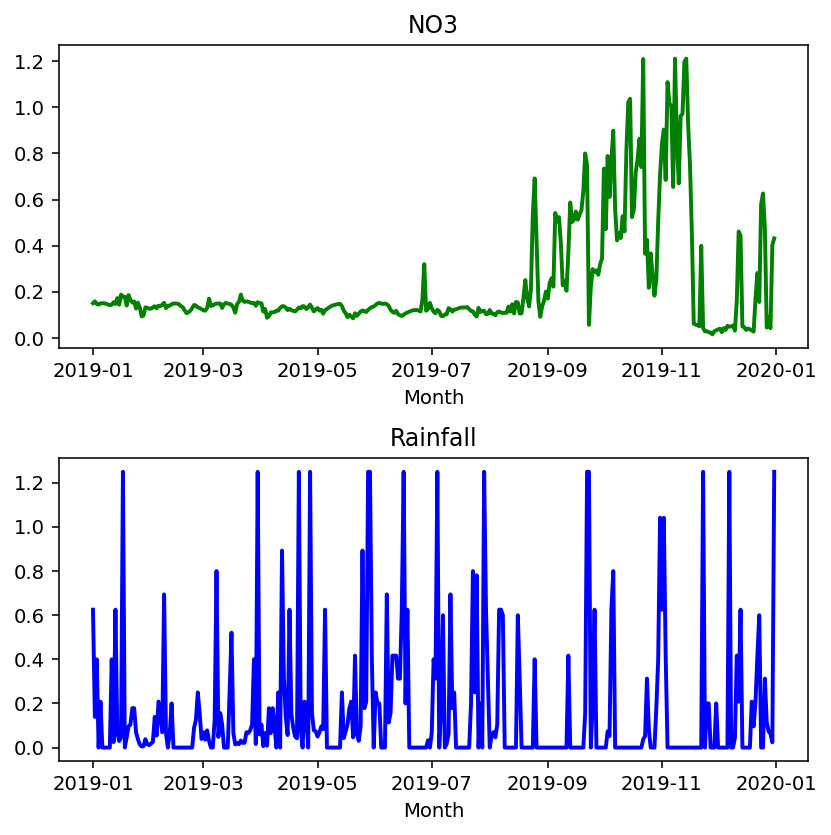

In [39]:
# Ve 2 line plot no3 vs rainfall
import matplotlib.dates as mdates

# Create figure and plot space
fig, ax = plt.subplots(2, figsize=[6, 6], dpi = 141,  constrained_layout = True)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax[0].plot(df_scale_no3['Date time'], df_scale_no3['NO3'], linewidth = 2, color='g')
ax[0].set_xlabel('Month')
ax[0].set_title('NO3')

ax[1].plot(df_scale_no3['Date time'], df_scale_no3['Rainfall'], linewidth = 2, color='b')
ax[1].set_xlabel('Month')
ax[1].set_title('Rainfall')

fig.tight_layout(pad = 1.0)

# plt.tick_params(axis='x', labelrotation=45) # xoay 45 độ
# plt.gcf().autofmt_xdate()
plt.show()

# Turbidity voi Rainfall

 Mean Turbidity value: 5.776370528918036 
 Median Turbidity value: 4.360416666666667 
 Min Turbidity value: 1.1854166666666666 
 Max Turbidity value: 32.59041666666666


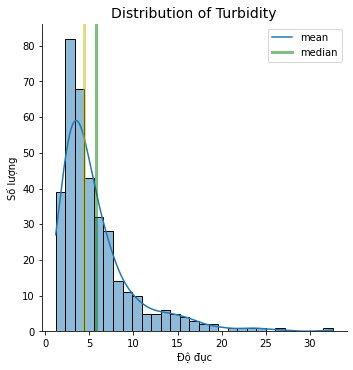

In [40]:
sns.displot(df["Turbidity"], kde=True)
plt.axvline(x=df.Turbidity.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.Turbidity.median(), linewidth=3, color='y', label="median", alpha=0.5)

plt.xlabel("Độ đục")
plt.ylabel("Số lượng")
plt.title("Distribution of Turbidity", size=14)
plt.legend(["mean", "median"]);

print(f' Mean Turbidity value: {df.Turbidity.mean()} \n Median Turbidity value: {df.Turbidity.median()} \n Min Turbidity value: {df.Turbidity.min()} \n Max Turbidity value: {df.Turbidity.max()}')

## Plot per month

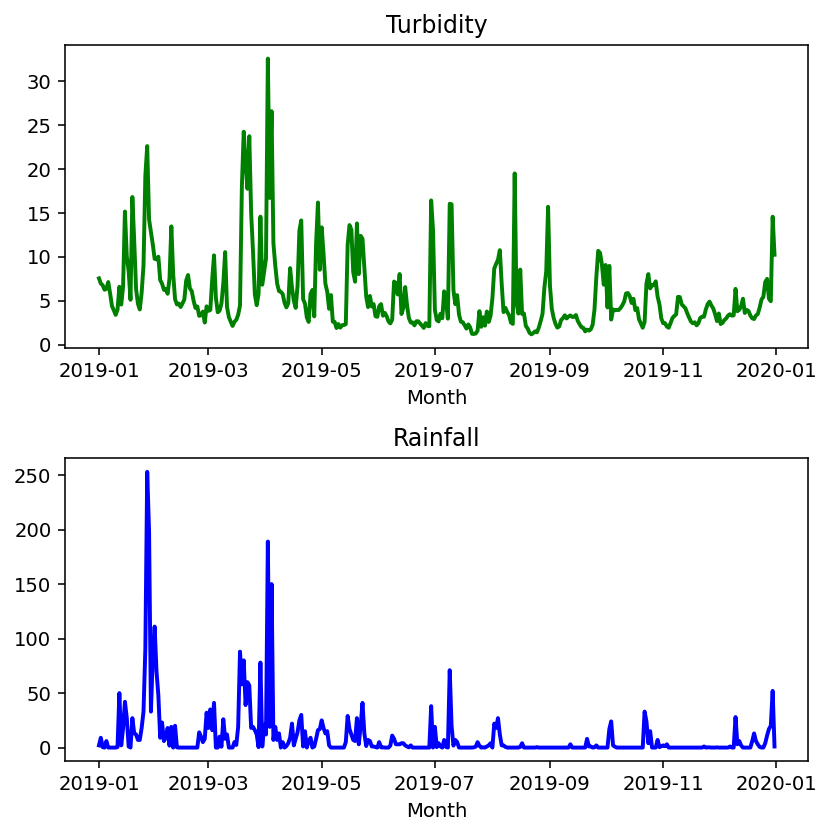

In [41]:
# Ve 2 line plot no3 vs rainfall
import matplotlib.dates as mdates

# Create figure and plot space
fig, ax = plt.subplots(2, figsize=[6, 6], dpi = 141)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax[0].plot(df['Date time'], df['Turbidity'], linewidth = 2, color='g')
ax[0].set_xlabel('Month')
ax[0].set_title('Turbidity')

ax[1].plot(df['Date time'], df['Rainfall'], linewidth = 2, color='b')
ax[1].set_xlabel('Month')
ax[1].set_title('Rainfall')

fig.tight_layout(pad = 1.0) # space 2 plot 

# plt.gcf().autofmt_xdate()
plt.show()

## Plot mean per month

In [42]:
df_mean_turbidity = df.groupby(pd.PeriodIndex(df['Date time'], freq="M"))[['Turbidity', 'Rainfall']].mean()
#df_mean_turbidity.reset_index(inplace=True)

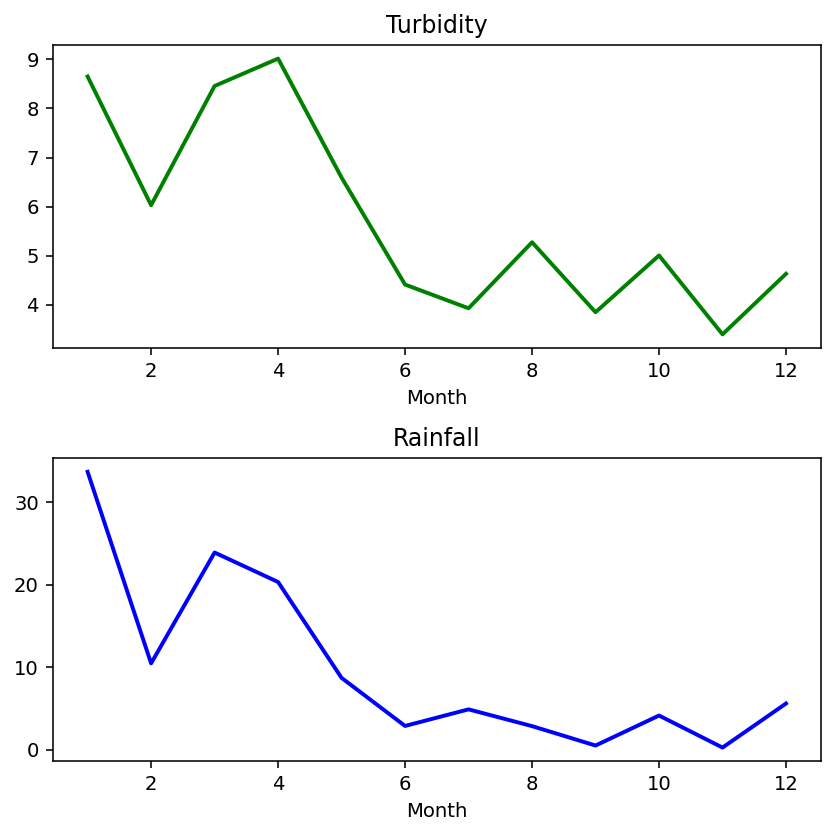

In [43]:
# Ve 2 line plot no3 vs rainfall
import matplotlib.dates as mdates

# Create figure and plot space
fig, ax = plt.subplots(2, figsize=[6, 6], dpi = 141)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax[0].plot(df_mean_turbidity.index.month, df_mean_turbidity['Turbidity'], linewidth = 2, color='g')
ax[0].set_xlabel('Month')
ax[0].set_title('Turbidity')

ax[1].plot(df_mean_turbidity.index.month, df_mean_turbidity['Rainfall'], linewidth = 2, color='b')
ax[1].set_xlabel('Month')
ax[1].set_title('Rainfall')

fig.tight_layout(pad = 1.0)

# plt.tick_params(axis='x', labelrotation=45) # xoay 45 độ
# plt.gcf().autofmt_xdate()
plt.show()

## Plot with scale feature Rainfall

In [44]:
df_scale_turbidity = df[['Date time', 'Turbidity', 'Rainfall']]

In [45]:
# Scale 
df_scale_turbidity['Rainfall'] = [1.25 / value if value >= 1 else value for value in df_scale_turbidity['Rainfall']] # Passed value < 1 
df_scale_turbidity 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date time,Turbidity,Rainfall
0,2019-01-01,7.564375,0.625000
1,2019-01-02,6.977500,0.138889
2,2019-01-03,6.779583,0.400000
3,2019-01-04,6.270208,0.000000
4,2019-01-05,6.375833,0.208333
...,...,...,...
360,2019-12-27,7.504375,0.113636
361,2019-12-28,5.246250,0.073529
362,2019-12-29,4.960625,0.062500
363,2019-12-30,14.585000,0.024038


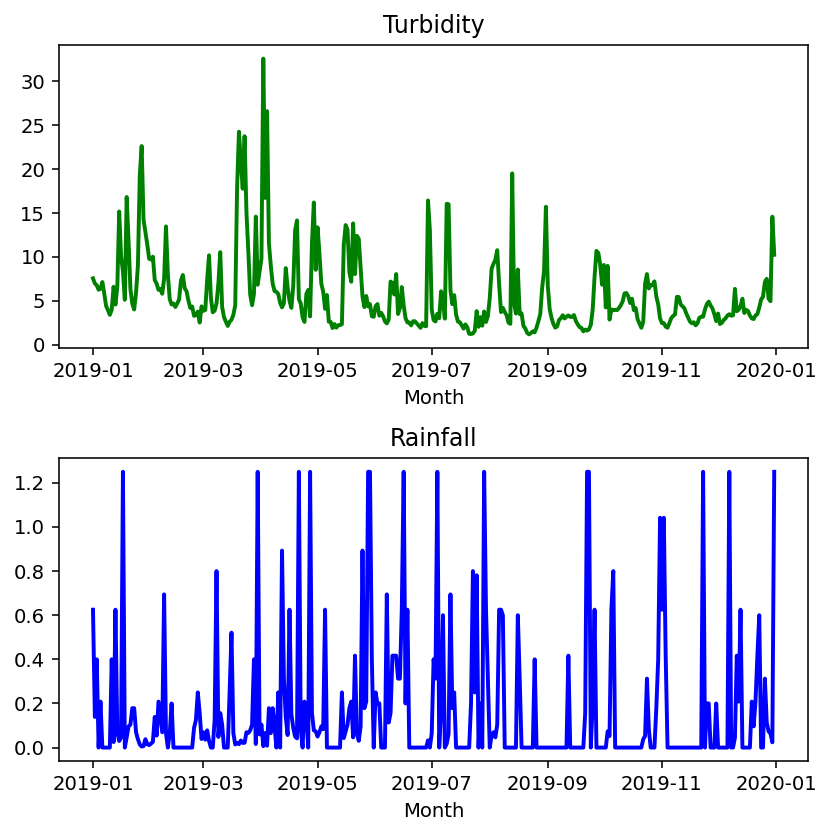

In [46]:
# Ve 2 line plot no3 vs rainfall
import matplotlib.dates as mdates

# Create figure and plot space
fig, ax = plt.subplots(2, figsize=[6, 6], dpi = 141)

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax[0].plot(df_scale_turbidity['Date time'], df_scale_turbidity['Turbidity'], linewidth = 2, color='g')
ax[0].set_xlabel('Month')
ax[0].set_title('Turbidity')

ax[1].plot(df_scale_turbidity['Date time'], df_scale_turbidity['Rainfall'], linewidth = 2, color='b')
ax[1].set_xlabel('Month')
ax[1].set_title('Rainfall')

fig.tight_layout(pad = 1.0)

# plt.tick_params(axis='x', labelrotation=45) # xoay 45 độ
# plt.gcf().autofmt_xdate()
plt.show()

# Plot rainfall and mean temperature by month

In [47]:
rain_by_month = df.groupby(df['Date time'].dt.month)['Rainfall'].mean()
temp_by_month = df.groupby(df['Date time'].dt.month)['Mean temperature'].mean()

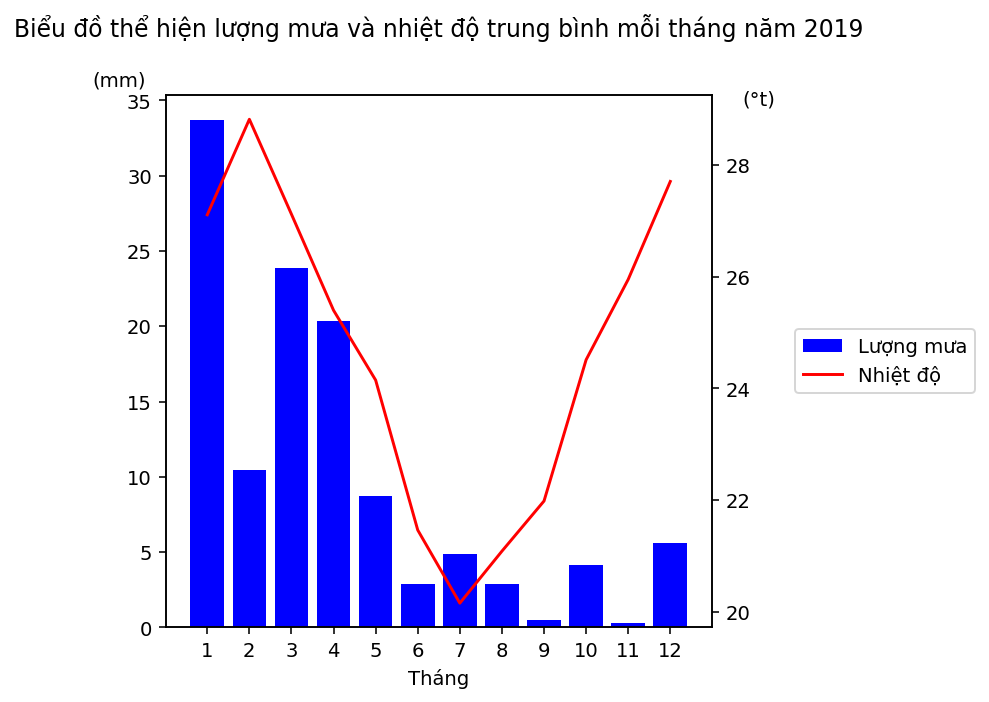

In [48]:
fig, ax1 = plt.subplots(figsize=[5,5], dpi=141)

ax2 = ax1.twinx()
barplot = ax1.bar(rain_by_month.index.tolist(), rain_by_month.values, color='b')
lineplot, = ax2.plot(temp_by_month.index.tolist(), temp_by_month.values, color='r')

ax1.set_title('Biểu đồ thể hiện lượng mưa và nhiệt độ trung bình mỗi tháng năm 2019', pad=30)
ax1.set_xlabel('Tháng')
ax1.set_ylabel('(mm)', y=1.01, rotation=0)
ax2.set_ylabel('(°t)', y=1.01, rotation=0)

plt.xticks(rain_by_month.index.tolist())
plt.legend(handles=[barplot, lineplot], labels=['Lượng mưa', 'Nhiệt độ'], loc='right', bbox_to_anchor=(1.5, 0.5))
plt.show()